# RSG opdracht Data-visualisatie

De opdracht luidt als volgt. Zoek een dataset op het internet of gebruik een locale dataset waar je een visualisatie analyse op kan toepassen. Denk er hierbij aan dat je data voldoende categorische en numerieke attributen heeft. 

Kijk zonodig op https://www.data-to-viz.com/ om een methode te kiezen. 

De docenten zullen hier online ondersteuning bij bieden. Mochten jullie vragen hebben dan zullen wij er zijn. Zo nodig kan er met jullie toestemming ook live gedebugged worden door `remote control` te geven aan de docenten. 

Waar haal je data vandaan? 
Denk aan: 

- Kaggle https://www.kaggle.com/datasets
- WikiDataDumps 

Geef bij je onderzoek voldoende documentatie en geef duidelijk aan welke stappen je maakt.

In [265]:
#importeren packages
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np 

In [266]:
# inlezen van dataset van Trumps tweets
data = pd.read_csv('trumptweets.csv')

In [270]:
# inspecteren van de headers
print(data.columns)
data.head(2)

Index(['id', 'link', 'content', 'date', 'retweets', 'favorites', 'mentions',
       'hashtags', 'geo', 'tremendousyn', 'year', 'year_month', 'tweetlength'],
      dtype='object')


,id,link,content,date,retweets,favorites,mentions,hashtags,geo,tremendousyn,year,year_month,tweetlength
0,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,2009-05-04 20:54:25,500,868,NaN,NaN,NaN,0.0,2009,2009-05,117
1,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,2009-05-05 03:00:10,33,273,NaN,NaN,NaN,0.0,2009,2009-05,131


In [268]:
# Laten we kijken hoeveel tweets van Trump tremendous gebruiken
data['tremendousyn'] = data.content.str.contains('(tremendous|Tremendous|TREMENDOUS)')
data['tremendousyn'] = data['tremendousyn'].replace(True, 1)
data['tremendousyn'] = data['tremendousyn'].replace(False, 0)

In [269]:
# aanmaken van nieuwe kolommen
# Jaar
data['year'] = pd.DatetimeIndex(data['date']).year

# Jaar/maand
data['year_month'] = pd.to_datetime(data['date']).dt.to_period('M')

# Lengte van tweet
data['tweetlength'] = data.content.str.len()

# Lengte van tweet catagorisch


In [196]:
nunique_cats = np.unique(data['tremendousyn'], return_counts=True)
print(*nunique_cats) 

[0 1] [40891   231]


In [244]:
data.head()

,id,link,content,retweets,favorites,mentions,hashtags,geo,tremendousyn,year,tweetlength,tweetlengthcat
year_month,,,,,,,,,,,,
2009-05,1698308935,https://twitter.com/realDonaldTrump/status/169...,Be sure to tune in and watch Donald Trump on L...,500,868,NaN,NaN,NaN,0.0,2009,117,0
2009-05,1701461182,https://twitter.com/realDonaldTrump/status/170...,Donald Trump will be appearing on The View tom...,33,273,NaN,NaN,NaN,0.0,2009,131,0
2009-05,1737479987,https://twitter.com/realDonaldTrump/status/173...,Donald Trump reads Top Ten Financial Tips on L...,12,18,NaN,NaN,NaN,0.0,2009,116,0
2009-05,1741160716,https://twitter.com/realDonaldTrump/status/174...,New Blog Post: Celebrity Apprentice Finale and...,11,24,NaN,NaN,NaN,0.0,2009,103,0
2009-05,1773561338,https://twitter.com/realDonaldTrump/status/177...,"""My persona will never be that of a wallflower...",1399,1965,NaN,NaN,NaN,0.0,2009,109,0


In [272]:
data.set_index('date', inplace=True)




Text(0.5, 1.0, 'Length of Trumps Tweets')

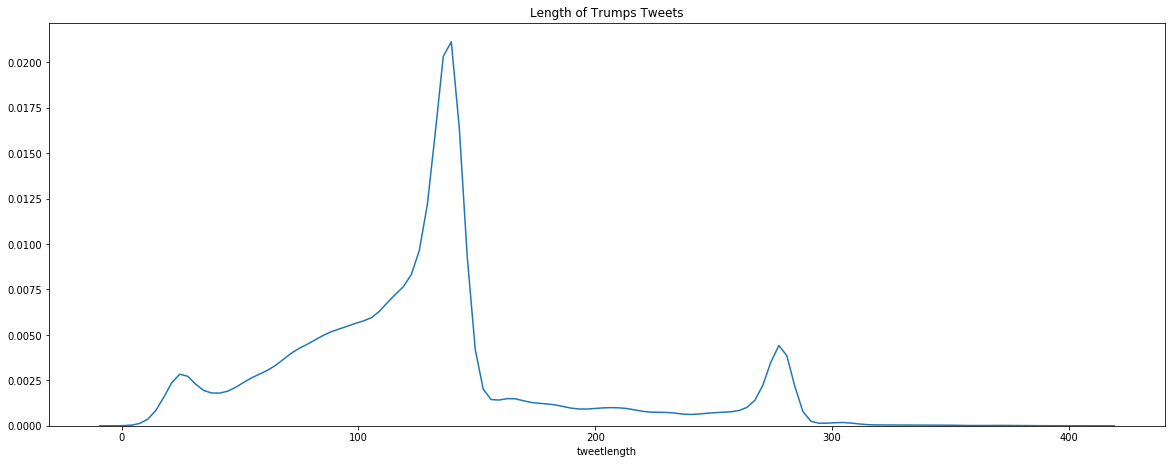

In [250]:
# Lengte van Trumps Tweets
tit_fig_sb, axes = plt.subplots(nrows=1,ncols=1, figsize = (20,7))
tit_fig_sb.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.2)
sns.distplot( data["tweetlength"], bins=20, hist=False ).set_title('Length of Trumps Tweets')



Text(0.5, 1.0, 'Length of Trumps Tweets')

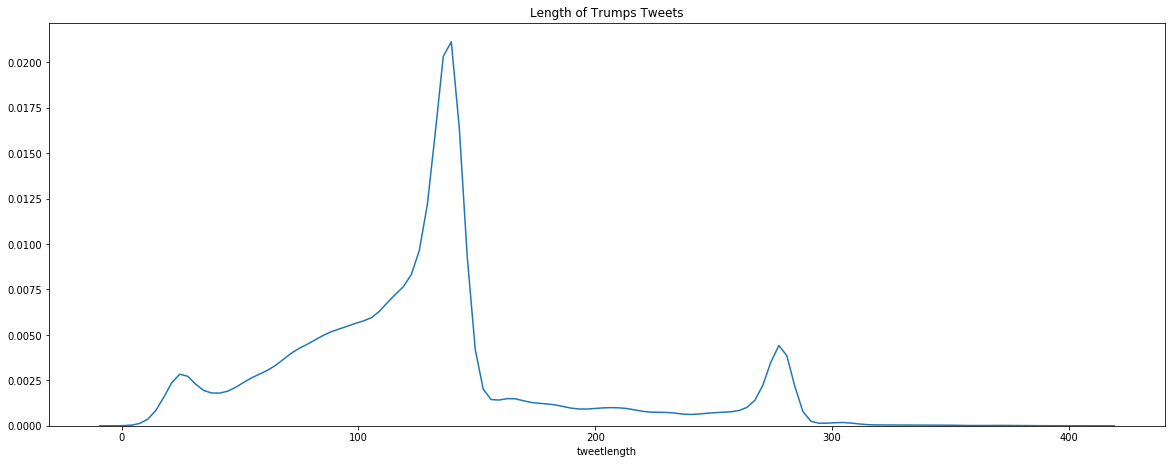

In [273]:
tit_fig_sb, axes = plt.subplots(nrows=1,ncols=1, figsize = (20,7))
tit_fig_sb.subplots_adjust(left = 0.125, right = 0.9, bottom = 0.1, top = 0.9, wspace = 0.2, hspace = 0.2)
sns.distplot( data["tweetlength"], bins=20, hist=False ).set_title('Length of Trumps Tweets')

